In [306]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Task 1

In [307]:
# Load count rate date from txt using pandas
cr_no_light = pd.read_csv('data/no_light_count_rate.txt', sep='\t', skiprows=18)
cr650 = pd.read_csv('data/650nm_count_rate.txt', sep='\t', skiprows=18)
cr1310 = pd.read_csv('data/1310nm_count_rate.txt', sep='\t', skiprows=18)
cr1550 = pd.read_csv('data/1550nm_count_rate.txt', sep='\t', skiprows=18)
 
# Only keep columns "BV5" and "C5" and "BC"
cr650 = cr650[["BV5", "C5", "BC"]]
cr1310 = cr1310[["BV5", "C5", "BC"]]
cr1550 = cr1550[["BV5", "C5", "BC"]]
cr_no_light = cr_no_light[["BV5", "C5", "BC"]]

cr_no_light

,BV5,C5,BC
0,-0.000,0,0.00
1,-0.000,0,0.25
2,-0.003,0,0.50
3,-0.000,0,0.75
4,-0.001,0,1.00
...,...,...,...
156,1.391,0,39.00
157,1.399,0,39.25
158,1.407,0,39.50
159,1.415,0,39.75


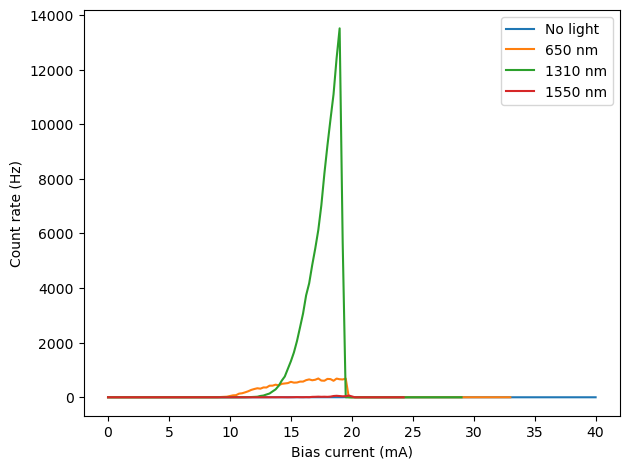

In [308]:
# plot C5 as function of BC
plt.plot(cr_no_light["BC"], cr_no_light["C5"], label="No light")
plt.plot(cr650["BC"], cr650["C5"], label="650 nm")
plt.plot(cr1310["BC"], cr1310["C5"], label="1310 nm")
plt.plot(cr1550["BC"], cr1550["C5"], label="1550 nm")
plt.xlabel("Bias current (mA)")
plt.ylabel("Count rate (Hz)")
plt.legend()
plt.tight_layout()

plt.show()

Total counts in 650 nm:  116023


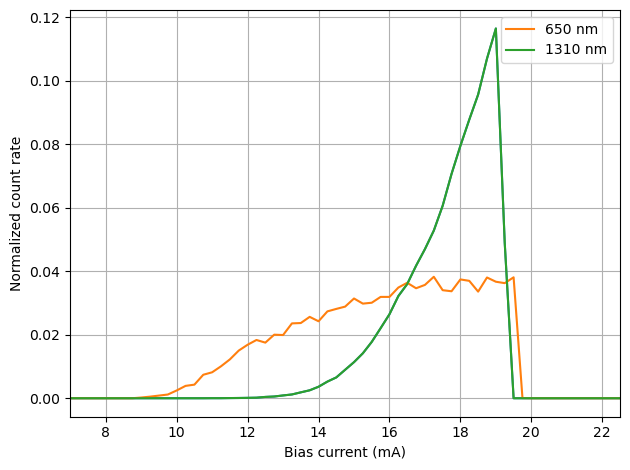

In [320]:
# total counts in cr1330
counts_1310 = cr1310["C5"].sum()
print("Total counts in 650 nm: ", counts_1310)

# create a new column with the counts divided by total count
cr1310["C5_norm"] = cr1310["C5"] / counts_1310

# plot new columns
plt.plot(cr1310["BC"], cr1310["C5_norm"])

#do this for all data
counts_650 = cr650["C5"].sum()
cr650["C5_norm"] = cr650["C5"] / counts_650
counts_1310 = cr1310["C5"].sum()
cr1310["C5_norm"] = cr1310["C5"] / counts_1310
counts_1550 = cr1550["C5"].sum()
cr1550["C5_norm"] = cr1550["C5"] / counts_1550
counts_no_light = cr_no_light["C5"].sum()
cr_no_light["C5_norm"] = cr_no_light["C5"] / counts_no_light

# plot all in one figure from 5 to 25 mA
#plt.plot(cr_no_light["BC"], cr_no_light["C5_norm"], label="No light")
plt.plot(cr650["BC"], cr650["C5_norm"], label="650 nm")
plt.plot(cr1310["BC"], cr1310["C5_norm"], label="1310 nm")
#plt.plot(cr1550["BC"], cr1550["C5_norm"], label="1550 nm")
plt.xlabel("Bias current (mA)")
plt.ylabel("Normalized count rate")
plt.legend()
plt.tight_layout()
plt.xlim(7, 22.5)
plt.grid()
plt.show()

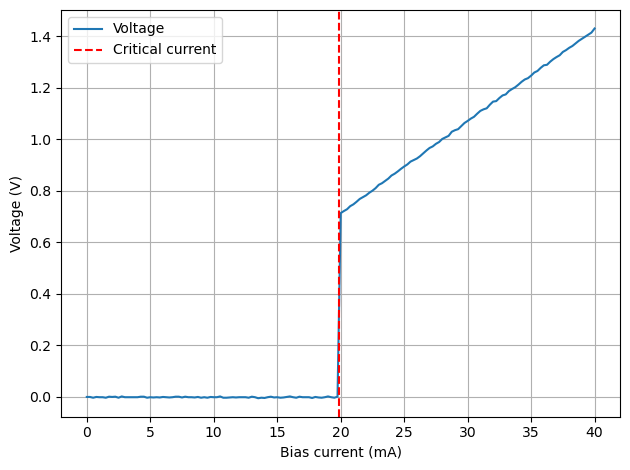

In [310]:
# Plot BV5 as function of BC for no_light case
plt.plot(cr_no_light["BC"], cr_no_light["BV5"], label="Voltage")
plt.xlabel("Bias current (mA)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid()
plt.tight_layout()

I_c = (20 + 19.75)/2

plt.axvline(x=I_c, color='r', linestyle='--', label="Critical current")
plt.legend()

plt.show()

### Task 2

In [311]:
power_file_names = ["5-04", "5-32", "5-63", "5-97", "6-32", "6-71", "7-13"]
power_levels_dBm = np.array([-5.04, -5.32, -5.63, -5.97, -6.32, -6.71, -7.13])
power_levels_mW = 10**(power_levels_dBm/10)


power504 = pd.read_csv('data/5-04dBm.txt', sep='\t', skiprows=9)

power504 = power504[["C4"]]
# mean and std
mean = power504.mean()
std = power504.std()

print(std)

count_data = pd.DataFrame(columns=["power_dBm", "power_mW", "mean", "std"])
for i, filename in enumerate(power_file_names):
    count_data_file = pd.read_csv('data/' + filename + 'dBm.txt', sep='\t', skiprows=9)
    count_data_file = count_data_file[["C4"]]
    # mean and std as floats
    mean = float(count_data_file.mean())
    std = float(count_data_file.std())
    count_data.loc[i] = [power_levels_dBm[i], power_levels_mW[i], mean, std]

count_data

C4    2002.987344
dtype: float64


,power_dBm,power_mW,mean,std
0,-5.04,0.313329,23866.967742,2002.987344
1,-5.32,0.293765,23403.333333,1871.652417
2,-5.63,0.273527,21235.741935,1599.264393
3,-5.97,0.252930,18715.000000,1458.757022
4,-6.32,0.233346,16879.943396,1338.890505
5,-6.71,0.213304,13742.478261,1113.503230
6,-7.13,0.193642,13146.096774,1100.996317


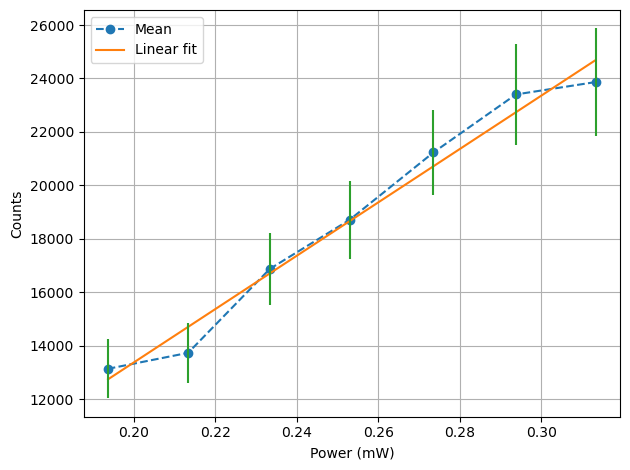

'\n# same plot but with dbm\nplt.plot(count_data["power_dBm"], count_data["mean"], label="Mean", linestyle=\'--\', marker=\'o\')\nplt.xlabel("Power (dBm)")\nplt.ylabel("Counts")\nplt.legend()\nplt.tight_layout()\nplt.grid()\nplt.show()\n'

In [312]:
# Do a linear fit
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, count_data["power_mW"], count_data["mean"])

# Plot mean and std as function of power
plt.plot(count_data["power_mW"], count_data["mean"], label="Mean", linestyle='--', marker='o')
plt.plot(count_data["power_mW"], linear(count_data["power_mW"], *popt), label="Linear fit")
# errorbars for std
plt.errorbar(count_data["power_mW"], count_data["mean"], yerr=count_data["std"], linestyle='None')
plt.xlabel("Power (mW)")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

"""
# same plot but with dbm
plt.plot(count_data["power_dBm"], count_data["mean"], label="Mean", linestyle='--', marker='o')
plt.xlabel("Power (dBm)")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()
"""

### Task 3

8.668021e-10
4.5000002e-10 9.399997999999999e-09


(-2.5e-09, 2e-08)

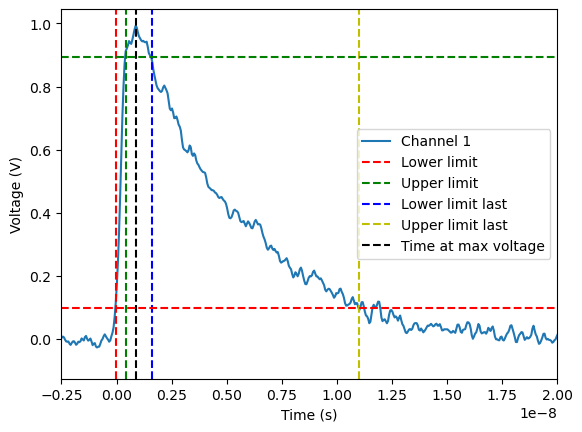

In [313]:
channel = 4
# get filenames in data/detection_channels
import os
filenames = os.listdir(f"data/detection_events_ch{channel}")

path = f"data/detection_events_ch{channel}/C1--C--00055.txt"
data = pd.read_csv(path, sep=',', skiprows=4)
max_voltage = data["Ampl"].max()
lower_limit = 0.1*max_voltage
upper_limit = 0.9*max_voltage

time_at_max_voltage = data[data["Ampl"] == max_voltage]["Time"].iloc[0]
print(time_at_max_voltage)

t1 = data[data["Ampl"] > lower_limit]["Time"].iloc[0]
t2 = data[data["Ampl"] > upper_limit]["Time"].iloc[0]

# filter amp higher than lower limit and time larger than time at max voltage
data_filtered = data[data["Ampl"] > lower_limit]

t3 = data[(data["Ampl"] < upper_limit) & (data["Time"] > time_at_max_voltage)]["Time"].iloc[0]
t4 = data[(data["Ampl"] < lower_limit) & (data["Time"] > time_at_max_voltage)]["Time"].iloc[0]

t_rise = t2 - t1
t_decay = t4 - t3

print(t_rise, t_decay)

plt.plot(data["Time"], data["Ampl"], label="Channel 1")
plt.axvline(x=t1, color='r', linestyle='--', label="Lower limit")
plt.axvline(x=t2, color='g', linestyle='--', label="Upper limit")
plt.axvline(x=t3, color='b', linestyle='--', label="Lower limit last")
plt.axvline(x=t4, color='y', linestyle='--', label="Upper limit last")
plt.axvline(x=time_at_max_voltage, color='k', linestyle='--', label="Time at max voltage")
plt.axhline(y=lower_limit, color='r', linestyle='--')
plt.axhline(y=upper_limit, color='g', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.xlim(-0.25e-8, 2e-8)


In [323]:
channel = 4

filenames = os.listdir(f"data/detection_events_ch{channel}")

times = pd.DataFrame(columns=["rise_time", "decay_time"])

for filename in filenames:
    path = f"data/detection_events_ch{channel}/" + filename
    curr_event = pd.read_csv(path, sep=',', skiprows=4)
    curr_event["Time"] = curr_event["Time"]*10**9
    max_voltage = curr_event["Ampl"].max()
    lower_limit = 0.1*max_voltage
    upper_limit = 0.9*max_voltage

    t1 = curr_event[curr_event["Ampl"] > lower_limit]["Time"].iloc[0]
    t2 = curr_event[curr_event["Ampl"] > upper_limit]["Time"].iloc[0]
    t3 = curr_event[(curr_event["Ampl"] < upper_limit) & (curr_event["Time"] > time_at_max_voltage)]["Time"].iloc[0]
    t4 = curr_event[(curr_event["Ampl"] < lower_limit) & (curr_event["Time"] > time_at_max_voltage)]["Time"].iloc[0]

    t_rise = t2 - t1
    t_decay = t4 - t3

    times.loc[len(times)] = [t_rise, t_decay]

times.head(50)

,rise_time,decay_time
0,0.45,11.000002
1,0.40,11.050002
2,0.45,10.899997
3,0.40,10.749996
4,0.45,10.700000
5,0.40,10.749998
6,0.40,11.000004
7,0.45,11.250003
8,0.45,10.799999
9,0.45,10.550002


11.049586531711983 0.3543994551291998


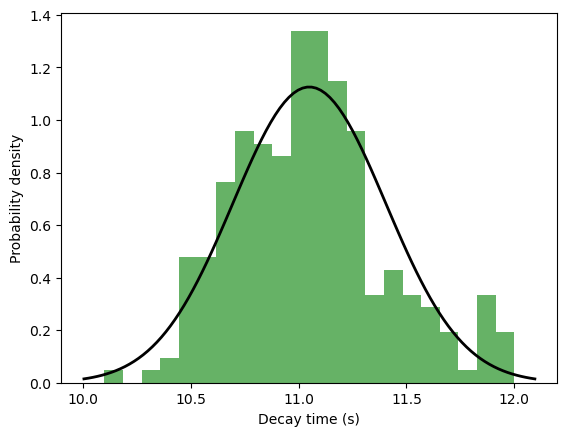

In [324]:
# fit decay time histogram to gaussian
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(times["decay_time"])

# Plot the histogram with gaussian fit
plt.hist(times["decay_time"], bins=22, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Decay time (s)")
plt.ylabel("Probability density")


print(mu, std)

0.43884297304694225 0.03520166218956846


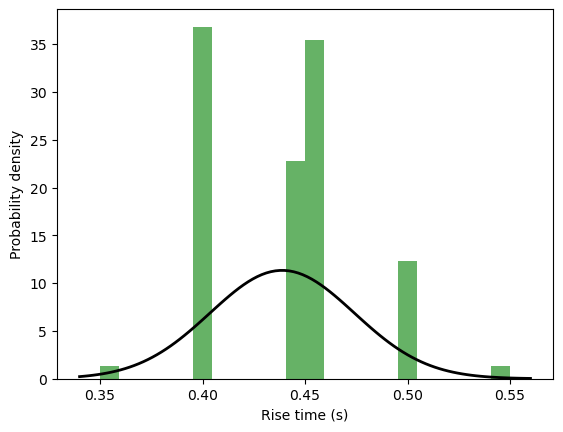

In [316]:
# Fit a normal distribution to the data:
mu, std = norm.fit(times["rise_time"])

# Plot the histogram with gaussian fit
bin_edges = np.array([0.35, ])
plt.hist(times["rise_time"], bins=22, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Rise time (s)")
plt.ylabel("Probability density")


print(mu, std)